In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("../data/raw/titanic.csv")
dataset.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
dataset.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [4]:
dataset.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

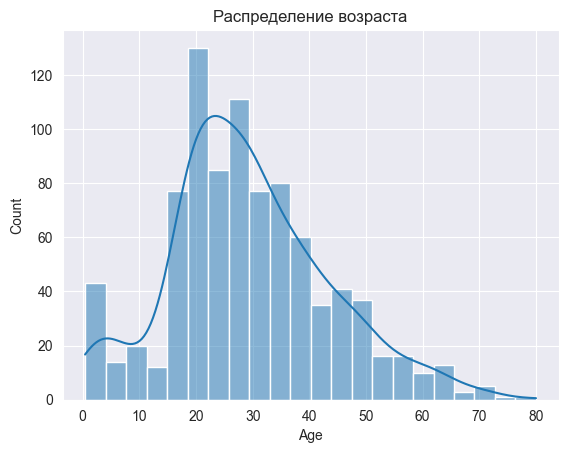

In [5]:
sns.histplot(dataset['Age'].dropna(), kde=True)
plt.title("Распределение возраста")
plt.show()

In [6]:
dataset['Survived'].value_counts()

Survived
0    545
1    342
Name: count, dtype: int64

In [7]:
def preprocess(df):
    df = df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, errors='ignore')
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
    return df

In [8]:
dataset_clean = preprocess(dataset)
dataset_clean.to_csv("../data/processed/titanic_processed.csv", index=False)

<Axes: >

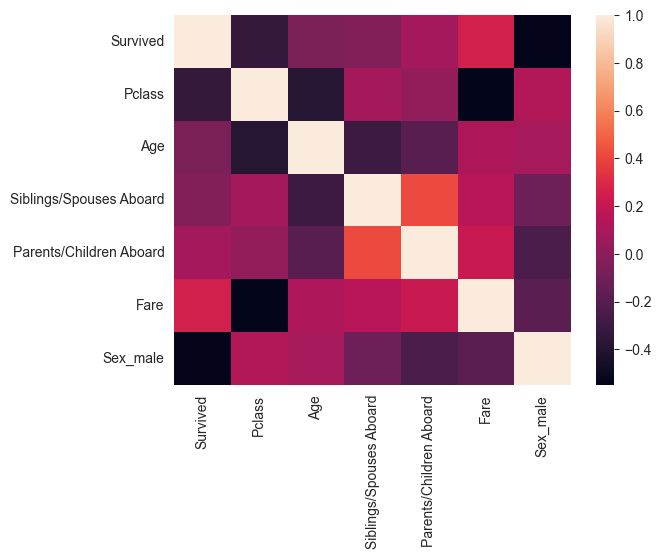

In [12]:
corr = dataset_clean.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)